##### Import the GIS module and other needed Python modules


The IPython.display module has some helper functions that the Python API takes advantage of for displaying objects like item details and maps in the notebook.

In [1]:
from arcgis.gis import GIS
from getpass import getpass
from IPython.display import display

##### Create the GIS object and point it to AGOL

In [2]:
# Get username and password
username = input('Username: ')
password = getpass(prompt='Password: ')

Username: cambgis_sean
Password: ········


In [3]:
# Connect to portal
gis = GIS("https://arcgis.com/", username, password)

##### Test the connection
The output here is an example of the Python API taking advantage of IPython.display.

<User username:cambgis_sean>
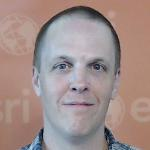

In [4]:
user = gis.users.get(username)
user

##### Get the item that you want to update
> Portals allows users to store and share a variety of items. Each item has a type, such as Web Map or Feature Service, and a set of type keywords that provide additional information on the characteristics of the type.

See [Items and item types](http://resources.arcgis.com/en/help/arcgis-rest-api/index.html#/Items_and_item_types/02r3000000ms000000/) for more information.

In [5]:
title = input("Feature class to search for: ")

Feature class to search for: hospitals


In [6]:
items = gis.content.search(query="title:'" + title + "' AND owner:" + username, item_type="Feature Service")
print(type(items), len(items))
print(type(items[0]))

<class 'list'> 1
<class 'arcgis.gis.Item'>


<Item title:"hospitals" type:Feature Service owner:cambgis_sean>
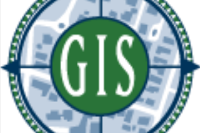

In [7]:
item = items[0]
item

In [8]:
item.tags

['hospital']

##### Update the metadata

In [9]:
# First set up some variables for input ot the *update* method.
thumbnail_path = "c:/temp/Hospitals.JPG"
tags = list(item.tags)
tags.append("health")
item_properties = {"snippet": "Location of Cambridge hospitals.",
                   "title": "Cambridge Hospitals",
                   "tags": ','.join(tags),
                   "accessinformation": "City of Cambridge GIS",
                   "licenseInfo": "License Info"
}

<Item title:"Cambridge Hospitals" type:Feature Service owner:cambgis_sean>
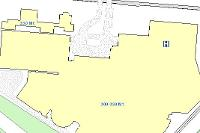

In [10]:
# Then perform the update
item.update(item_properties, thumbnail=thumbnail_path)
item

In [11]:
# Get the updated *item*
items[0].tags

['hospital', 'health']

##### Final code

Removing the display code and reducing the above to just what's needed to update the metadata shows that the Python API requires very little code to update an *item*'s metadata.  Error handling would need to be added for production, but that is required whether you use the Python API or interact with the REST API directly.

```python
# ##### Import the GIS module and other needed Python modules
from arcgis.gis import GIS
from getpass import getpass

# ##### Create the GIS object and point it to AGOL
# Get username and password
username = input('Username: ')
password = getpass(prompt='Password: ')

# Connect to portal
gis = GIS("https://arcgis.com/", username, password)


# ##### Get the item that you want to update
title = input("Feature class to search for: ")

items = gis.content.search(query="title:'" + title + "' AND owner:" + username, item_type="Feature Service")
item = items[0]

# ##### Update the metadata
# First set up some variables for input ot the *update* method.
thumbnail_path = "c:/temp/Hospitals.JPG"
tags = list(item.tags)
tags.append("health")
item_properties = {"snippet": "Location of Cambridge hospitals.",
                   "title": "Cambridge Hospitals",
                   "tags": ','.join(tags),
                   "accessinformation": "City of Cambridge GIS",
                   "licenseInfo": "License Info"
}


# Then perform the update
item.update(item_properties, thumbnail=thumbnail_path)

```